In [1]:
from retina import retina
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
def generate_final_targets(set_t, roi):
    
    '''
    Steps ocurring in the function:
    
    1 - Loads in the targets one-by-one, 
    2 - concatenate then together
    3 - Warps the targets and save them
    '''
    
    data_dir_who = '/mnt/sdb/Ubuntu/whoRF/doctor_who_frames/'

    number_of_run_files = len(glob(f'{data_dir_who}/in_between_processing/{set_t}_npy/{set_t[:-3]}_video_run*'))

    targets_list = []
    signals_list_per_roi = [[] for _ in roi]


    for run_i in tqdm(range(1,number_of_run_files+1)):

        if set_t == 'training':
            run_str = f'{run_i:0>3}'
        else:
            run_str = f'{run_i}'
            
        seen_img =  np.load(f'{data_dir_who}/in_between_processing/{set_t}_npy/{set_t[:-3]}_video_run{run_str}.npy')
        n_frames = seen_img.shape[0]
        targets_list.append(seen_img/255)

    targets = np.concatenate(targets_list).astype('float32')

    ## R E T I N A W A R P
    for fi in range(targets.shape[3]): 
        img = np.transpose(targets[:,:,:,fi], [1,2,0])
        img = warp_image(img)
        targets[:,:,:,fi] = np.transpose(img, [2,0,1])

        plt.imshow(targets[665])
        
        os.makedirs(f'{data_dir_who}/{set_t[:-3]}_targets', exist_ok = True)

        np.save(f'{data_dir_who}/{set_t[:-3]}_targets/targets_warped.npy', targets)


100%|██████████| 7/7 [00:00<00:00, 56.71it/s]


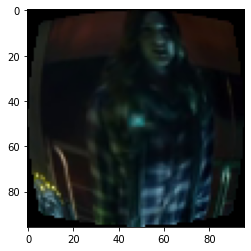

In [5]:
generate_final_targets('testing', 'MT')